## MLB Post Season Analysis
By: Brian Preisler
Udacity Data Analysis Nanodegree
November 2016

The questions this analysis will attempt to answer:

- Do the batting averages of American Major League baseball players significantly change either positively or negatively in the post season compared to the regular season?
    -If yes, positively, the hypothesis would be that professional players perform better under higher pressure
    -If yes, negatively, the hypothesis would be that professional players allow the higher pressure to negatively impact their performance.

- If post season batting averages are significantly different from the regular season, this analysis will look at three potential leading contributors or independent variables to see which, if any, mostly closely affect the dependent variable


## Load Data from CSVs

In [15]:
import pandas as pd

#Imports the datasets as dataframes to be used in the analysis
batting = pd.read_csv('C:\\Users\\brian.preisler\\Python\\P2\\baseballdatabank-master\\core\\batting.csv')
batting_post = pd.read_csv('C:\\Users\\brian.preisler\\Python\\P2\\baseballdatabank-master\\core\\battingpost.csv')
salaries = pd.read_csv('C:\\Users\\brian.preisler\\Python\\P2\\baseballdatabank-master\\core\\salaries.csv')
college_playing = pd.read_csv('C:\\Users\\brian.preisler\\Python\\P2\\baseballdatabank-master\\core\\collegeplaying.csv')
awards_players = pd.read_csv('C:\\Users\\brian.preisler\\Python\\P2\\baseballdatabank-master\\core\\awardsplayers.csv')


In [16]:
#Print out some data to look at columns as well as original size of datasets
print batting.columns
print 'number of rows in batting:', len(batting)
print 'number of rows in batting in the post season:', len(batting_post)
print 'number of rows in batting after grouping on player:',len(batting.groupby('playerID'))
print 'same for post season:', len(batting_post.groupby('playerID'))

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO', u'IBB',
       u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')
number of rows in batting: 101332
number of rows in batting in the post season: 11690
number of rows in batting after grouping on player: 18659
same for post season: 3973


## Clean data types

In [17]:
#only use batting stats from the modern era, in alignment with the norm for MLB stat keeping
batting_post = batting_post.drop(batting_post[batting_post.yearID < 1900].index)
batting_raw = batting.loc[:, ['playerID', 'H', 'AB']]
batting_post_raw = batting_post.loc[:, ['playerID', 'H', 'AB']]
college_playing_raw = college_playing.loc[:, ['playerID', 'yearID']]

print batting_raw.head(10)
batting_post_raw.head(10)

    playerID     H     AB
0  abercda01   0.0    4.0
1   addybo01  32.0  118.0
2  allisar01  40.0  137.0
3  allisdo01  44.0  133.0
4  ansonca01  39.0  120.0
5  armstbo01  11.0   49.0
6  barkeal01   1.0    4.0
7  barnero01  63.0  157.0
8  barrebi01   1.0    5.0
9  barrofr01  13.0   86.0


,playerID,H,AB
201,colliji01,9,36
202,crigelo01,6,26
203,dinnebi01,2,11
204,doughpa01,8,34
205,farredu01,0,1
206,ferriho01,9,31
207,freembu01,9,31
208,hugheto01,0,0
209,lachaca01,6,25
210,obrieja02,0,2




## Arrange data as needed


In [18]:
#combine the datasets with an inner join to just keep those players that have stats
# in the regular season and post season

def combine_dfs_outer(data1, data2):    
    combined = data1.merge(data2, on = 'playerID', how = 'outer')
    return combined

def combine_dfs(data1, data2):    
    combined = data1.merge(data2, on = 'playerID', how = 'inner')
    return combined
batting_combined = combine_dfs(batting_raw, batting_post_raw)

#print batting_combined

batting_combined_college = combine_dfs_outer(batting_combined, college_playing_raw)
batting_combined_college['yearID'].fillna(0, inplace=True)

print batting_combined_college

#add an avg column to the dataset for comparison purposes
batting_combined['AVG'] = batting_combined['H_x'] / batting_combined['AB_x']
batting_combined['AVGPOST'] = batting_combined['H_y'] / batting_combined['AB_y']

#group this new combined dataset by players and their means
batting_combined_grouped = batting_combined.groupby('playerID').mean()

         playerID    H_x   AB_x  H_y  AB_y  yearID
0       crossla01   54.0  203.0  2.0  19.0     0.0
1       crossla01   41.0  181.0  2.0  19.0     0.0
2       crossla01   44.0  199.0  2.0  19.0     0.0
3       crossla01   73.0  245.0  2.0  19.0     0.0
4       crossla01  121.0  402.0  2.0  19.0     0.0
5       crossla01  149.0  541.0  2.0  19.0     0.0
6       crossla01  124.0  415.0  2.0  19.0     0.0
7       crossla01  204.0  529.0  2.0  19.0     0.0
8       crossla01  145.0  535.0  2.0  19.0     0.0
9       crossla01  104.0  406.0  2.0  19.0     0.0
10      crossla01   89.0  344.0  2.0  19.0     0.0
11      crossla01  191.0  602.0  2.0  19.0     0.0
12      crossla01   44.0  154.0  2.0  19.0     0.0
13      crossla01  122.0  403.0  2.0  19.0     0.0
14      crossla01   18.0   61.0  2.0  19.0     0.0
15      crossla01  135.0  461.0  2.0  19.0     0.0
16      crossla01  139.0  424.0  2.0  19.0     0.0
17      crossla01  191.0  559.0  2.0  19.0     0.0
18      crossla01  163.0  559.0

In [19]:
import numpy as np
def invert(data):
    if data > 0:
        return 1
    else:
        return 0   
    
def played_in_college(df):
    return df['yearID'].apply(invert)
          
print played_in_college(batting_combined_college)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
258664    1
258665    1
258666    1
258667    1
258668    1
258669    1
258670    1
258671    1
258672    1
258673    1
258674    1
258675    1
258676    1
258677    1
258678    1
258679    1
258680    1
258681    1
258682    1
258683    1
258684    1
258685    1
258686    1
258687    1
258688    1
258689    1
258690    1
258691    1
258692    1
258693    1
Name: yearID, dtype: int64


## Investigating the data

The average of players batting in the regular season is: 0.208
The average of players batting in the post season is: 0.192


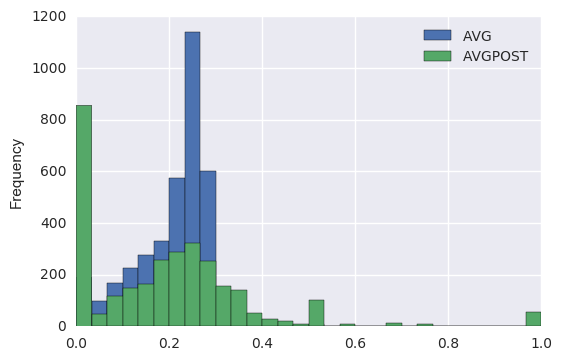

In [27]:
%matplotlib inline

import numpy as np
import matplotlib as plt 
import seaborn as sns
plt.rcParams.update({'figure.max_open_warning': 0})

print 'The average of players batting in the regular season is:', round(batting_combined_grouped['AVG'].mean(),3)
print 'The average of players batting in the post season is:', round(batting_combined_grouped['AVGPOST'].mean(),3)

avg_avgpost = batting_combined_grouped.loc[:,['AVG', 'AVGPOST']]

#checking out normality of distributions
avg_avgpost.plot.hist(by='AVG', bins=30);


## Determine Statistical Sig of means difference


In [21]:
import scipy
from scipy import stats

#running a paired t-test to determine if diff of means could be due to chance
scipy.stats.ttest_rel(avg_avgpost.loc[:, 'AVG'], avg_avgpost.loc[:, 'AVGPOST'], axis=0, nan_policy='omit')
?scipy.stats.ttest_rel()

## Investigate variables that could explain difference

In [51]:
#create a difference column to see if players performed better or worse in post season
#batting_combined['AVG_DIFF'] = batting_combined['AVGPOST'] - batting_combined['AVG']

#investigate whether salaries have an impact
batting_combined_salaries = combine_dfs(batting_combined, salaries)

#make sure to group before looking at correlations
batting_combined_grouped_salaries = batting_combined_salaries.groupby('playerID').mean()

#check and see if any player variable correlate to their post season performance
#avg_diff_salaries = batting_combined_grouped_salaries.loc[:,['AVG_DIFF', 'salary']]
#test1 = avg_diff_salaries.corr()
#print test1


batting_combined_college = batting_combined.merge(college_playing, \
    on = 'playerID', how = 'outer')

print batting_combined_college

batting_combined_grouped_college = batting_combined_college.groupby('playerID').mean()
batting_combined_grouped_college.iloc[:,35]
#check and see if any player variable correlate to their post season performance
#avg_diff_salaries = batting_combined_grouped_salaries.loc[:,['AVG_DIFF', 'salary']]
#test1 = avg_diff_salaries.corr()
#print test1


#print batting_combined_college.head(3)

#print batting_combined_grouped_college

#print avg_diff_salaries



         playerID    H_x   AB_x  H_y  AB_y       AVG   AVGPOST  AVG_DIFF  \
0       crossla01   54.0  203.0  2.0  19.0  0.266010  0.105263 -0.160747   
1       crossla01   41.0  181.0  2.0  19.0  0.226519  0.105263 -0.121256   
2       crossla01   44.0  199.0  2.0  19.0  0.221106  0.105263 -0.115842   
3       crossla01   73.0  245.0  2.0  19.0  0.297959  0.105263 -0.192696   
4       crossla01  121.0  402.0  2.0  19.0  0.300995  0.105263 -0.195732   
5       crossla01  149.0  541.0  2.0  19.0  0.275416  0.105263 -0.170153   
6       crossla01  124.0  415.0  2.0  19.0  0.298795  0.105263 -0.193532   
7       crossla01  204.0  529.0  2.0  19.0  0.385633  0.105263 -0.280370   
8       crossla01  145.0  535.0  2.0  19.0  0.271028  0.105263 -0.165765   
9       crossla01  104.0  406.0  2.0  19.0  0.256158  0.105263 -0.150894   
10      crossla01   89.0  344.0  2.0  19.0  0.258721  0.105263 -0.153458   
11      crossla01  191.0  602.0  2.0  19.0  0.317276  0.105263 -0.212013   
12      cros

IndexError: single positional indexer is out-of-bounds

In [15]:
def played_in_college(df):
    year = df.loc[:,'yearID']
    if np.isnan(year) is False:
        df['has_attended'] = 1
    else:
        df['has_attended'] = 0

#print np.isnan(batting_combined_grouped_college.loc[:,'yearID'])   

print batting_combined_grouped_college

#print batting_combined_grouped_college.applymap(played_in_college)
        
#def apply_played(df):
    #return df.apply(played_in_college)

#test2 = apply_played(batting_combined_grouped_college)

#print test2

              yearID_x     stint         G_x        AB_x        R_x  \
playerID                                                              
aardsda01          NaN       NaN         NaN         NaN        NaN   
aaronha01  1965.000000  1.000000  143.391304  537.565217  94.521739   
aaronto01  1966.857143  1.000000   62.428571  134.857143  14.571429   
abadan01           NaN       NaN         NaN         NaN        NaN   
abadfe01   2012.500000  1.000000   43.000000    1.333333   0.000000   
abbated01  1905.100000  1.100000   85.500000  304.400000  35.500000   
abbeybe01          NaN       NaN         NaN         NaN        NaN   
abbotje01  1999.000000  1.000000   46.600000  119.200000  16.400000   
abbotji01          NaN       NaN         NaN         NaN        NaN   
abbotku01  1997.100000  1.100000   70.200000  204.400000  27.300000   
abbotky01          NaN       NaN         NaN         NaN        NaN   
abercre01          NaN       NaN         NaN         NaN        NaN   
abernt